In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
magview = pd.read_csv("/embed/tables/embed_datathon_magview_reduced.csv")

/tmp/ipykernel_52284/834851845.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  magview = pd.read_csv("/embed/tables/embed_datathon_magview_reduced.csv")


In [30]:
magview.empi_anon.nunique()

115883

In [32]:
magview.empi_anon.nunique() - diagnostic.empi_anon.nunique()

67864

In [3]:
metadata = pd.read_csv("/embed/tables/embed_datathon_metadata_reduced.csv")

/tmp/ipykernel_52284/1587589196.py:1: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("/embed/tables/embed_datathon_metadata_reduced.csv")


In [4]:
diagnostic = magview.loc[magview["desc"].str.contains('diag', case=False)]

In [33]:
diagnostic.empi_anon.nunique()

48019

In [34]:
diagnostic.empi_anon.nunique() - biopsied.empi_anon.nunique()

37107

In [21]:
biopsied = magview.loc[magview['path_severity'].isin(range(6))]
print(biopsied.shape)
print(biopsied.empi_anon.nunique())
print(biopsied.acc_anon.nunique())

(23890, 27)
10912
16757


In [98]:
positive = biopsied_excluded.loc[biopsied_excluded["path_severity"].isin([0, 1])]
print(positive.shape)
print(positive.empi_anon.nunique())
print(positive.acc_anon.nunique())

(5398, 27)
2356
3427


In [99]:
negative = biopsied_excluded.loc[biopsied_excluded["path_severity"].isin(range(2, 6))]
print(negative.shape)
print(negative.empi_anon.nunique())
print(negative.acc_anon.nunique())

(13932, 27)
7507
11321


In [26]:
print(negative.shape[0] + positive.shape[0] == biopsied.shape[0])
print(negative.empi_anon.nunique() + positive.empi_anon.nunique() == biopsied.empi_anon.nunique())

True
False


In [27]:
in_both = set(negative.empi_anon.unique()).intersection(set(positive.empi_anon.unique()))

In [96]:
biopsied_excluded = biopsied.loc[~biopsied["empi_anon"].isin(list(in_both))]

In [97]:
biopsied_excluded.empi_anon.nunique()

9863

In [6]:
diagnostic["path_severity"].unique()

array([nan,  2.,  1.,  4.,  0.,  5.,  3.])

In [7]:
dx_neg = diagnostic.loc[diagnostic["path_severity"].isin([2, 3, 4, 5])]

In [8]:
meta_2d = metadata.loc[metadata["FinalImageType"].isin(["2D"])]

In [132]:
meta_2d.columns

Index(['empi_anon', 'acc_anon', 'cohort_num', 'study_date_anon',
       'StudyDescription', 'SeriesDescription', 'FinalImageType',
       'ImageLateralityFinal', 'ViewPosition', 'spot_mag', 'png_path',
       'SRC_DST', 'match_level', 'Manufacturer', 'ManufacturerModelName',
       'PatientSex', 'ProtocolName', 'SeriesNumber', 'SeriesTime', 'StudyID',
       'WindowCenter', 'WindowWidth', 'has_pix_array', 'category',
       'VOILUTFunction', 'WindowCenterWidthExplanation'],
      dtype='object')

In [134]:
meta_2d = meta_2d.loc[meta_2d.ViewPosition.isin(["CC", "MLO"])]

In [9]:
for i, n in enumerate(magview.columns):
    print(i, n)

0 empi_anon
1 acc_anon
2 desc
3 numfind
4 side
5 asses
6 tissueden
7 bside
8 type
9 GENDER_DESC
10 ETHNICITY_DESC
11 ETHNIC_GROUP_DESC
12 MARITAL_STATUS_DESC
13 age_at_study
14 study_date_anon
15 procdate_anon
16 cohort_num
17 path_severity
18 total_L_find
19 total_R_find
20 first_3_zip
21 massshape
22 massmargin
23 massdens
24 calcfind
25 calcdistri
26 calcnumber


<Axes: ylabel='Frequency'>

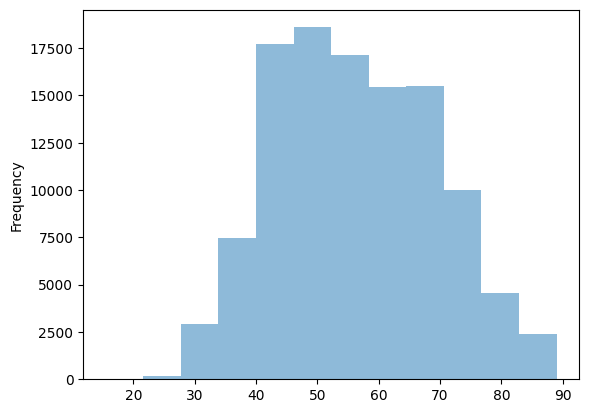

In [100]:
diagnostic["age_at_study"].plot.hist(bins=12, alpha=0.5)

<Axes: ylabel='Frequency'>

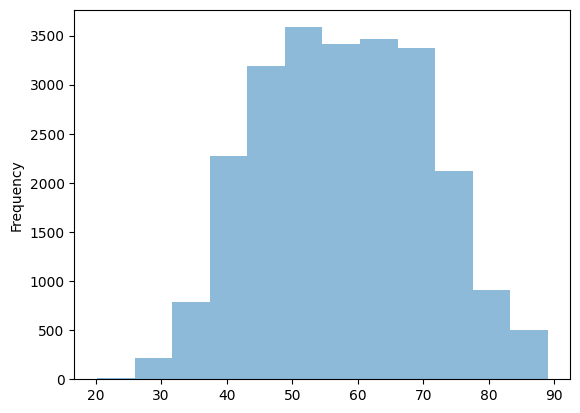

In [101]:
biopsied['age_at_study'].plot.hist(bins=12, alpha=0.5)

In [102]:
positive.age_at_study.median()

64.45306885151646

<Axes: ylabel='Frequency'>

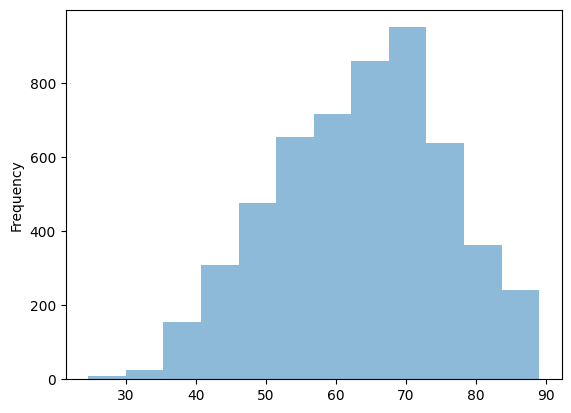

In [103]:
positive.age_at_study.plot.hist(bins=12, alpha=0.5)

In [104]:
negative.age_at_study.median()

53.750590361198384

<Axes: ylabel='Frequency'>

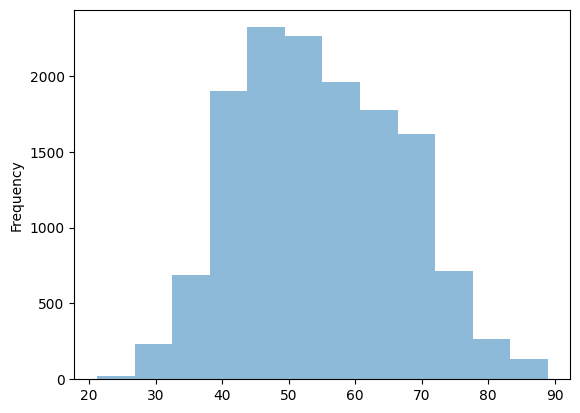

In [105]:
negative.age_at_study.plot.hist(bins=12, alpha=0.5)

In [106]:
biopsied.groupby("ETHNICITY_DESC").first_3_zip.value_counts()

ETHNICITY_DESC                      first_3_zip
African American or Black           300.0          1932
                                    303.0          1929
                                    303.0          1531
                                    300.0          1518
                                    300            1159
                                                   ... 
Unknown, Unavailable or Unreported  338.0             1
                                    616.0             1
                                    750.0             1
                                    116.0             1
                                    87.0              1
Name: count, Length: 410, dtype: int64

In [107]:
biopsied.MARITAL_STATUS_DESC.value_counts()

MARITAL_STATUS_DESC
Married         10988
Single           5946
Divorced         3175
Widow(er)        2157
Not Recorded      927
Unknown           314
Separated         283
Life Partner       44
Parted             10
Name: count, dtype: int64

In [51]:
biopsied.groupby("ETHNICITY_DESC").tissueden.value_counts() / diagnostic.groupby("ETHNICITY_DESC").tissueden.value_counts() * 100

ETHNICITY_DESC                             tissueden
African American or Black                  1.0          22.287928
                                           2.0          23.611172
                                           3.0          23.034158
                                           4.0          19.717289
                                           5.0           5.555556
American Indian or Alaskan Native          1.0          26.666667
                                           2.0          18.518519
                                           3.0          15.789474
                                           4.0          13.043478
                                           5.0                NaN
Asian                                      1.0           7.407407
                                           2.0          22.108495
                                           3.0          22.034471
                                           4.0          22.033898
                       

In [48]:
biopsied.groupby("ETHNICITY_DESC").massshape.value_counts() / diagnostic.groupby("ETHNICITY_DESC").massshape.value_counts() * 100

ETHNICITY_DESC                      massshape
African American or Black           A            78.851175
                                    B            22.891566
                                    D                  NaN
                                    F            39.116359
                                    G            47.350993
                                                   ...    
Unknown, Unavailable or Unreported  S            14.980545
                                    T            66.666667
                                    V                  NaN
                                    X            86.111111
                                    Y            25.675676
Name: count, Length: 99, dtype: float64

In [47]:
biopsied.groupby("ETHNICITY_DESC").massmargin.value_counts() / diagnostic.groupby("ETHNICITY_DESC").massmargin.value_counts() * 100

ETHNICITY_DESC                             massmargin
African American or Black                  D              17.952858
                                           I              64.802632
                                           M              85.365854
                                           S              87.365591
                                           U              31.106243
American Indian or Alaskan Native          D              27.272727
                                           I                    NaN
                                           M             100.000000
                                           S              16.666667
                                           U              50.000000
Asian                                      D              22.082019
                                           I              30.000000
                                           M              62.500000
                                           S              83.3

In [45]:
biopsied.groupby('ETHNICITY_DESC').massdens.value_counts() / diagnostic.groupby('ETHNICITY_DESC').massdens.value_counts() * 100

ETHNICITY_DESC                             massdens
African American or Black                  +           67.910448
                                           -           10.707804
                                           0            4.057279
                                           =           30.892571
American Indian or Alaskan Native          +           25.000000
                                           -                 NaN
                                           =           32.142857
Asian                                      +           59.615385
                                           -           14.705882
                                           0            5.000000
                                           =           27.559055
Caucasian or White                         +           67.799642
                                           -           15.773810
                                           0            3.149606
                                      

In [35]:
biopsied.tissueden.value_counts()

tissueden
3.0    10947
2.0     9436
1.0     1633
4.0     1413
5.0       35
Name: count, dtype: int64

In [36]:
biopsied.ETHNICITY_DESC.value_counts()

ETHNICITY_DESC
African American or Black                    12153
Caucasian or White                            9197
Unknown, Unavailable or Unreported            1132
Asian                                         1062
Native Hawaiian or Other Pacific Islander      190
Multiple                                        59
American Indian or Alaskan Native               48
Hispanic                                         3
Name: count, dtype: int64

In [37]:
diagnostic.ETHNICITY_DESC.value_counts()

ETHNICITY_DESC
African American or Black                    52937
Caucasian or White                           44612
Unknown, Unavailable or Unreported            7317
Asian                                         4906
Native Hawaiian or Other Pacific Islander     1485
Multiple                                       415
American Indian or Alaskan Native              286
Hispanic                                        14
Patient Declines                                 5
Not Recorded                                     4
Name: count, dtype: int64

In [39]:
biopsied.ETHNICITY_DESC.value_counts() / diagnostic.ETHNICITY_DESC.value_counts() * 100

ETHNICITY_DESC
African American or Black                    22.957478
American Indian or Alaskan Native            16.783217
Asian                                        21.646963
Caucasian or White                           20.615529
Hispanic                                     21.428571
Multiple                                     14.216867
Native Hawaiian or Other Pacific Islander    12.794613
Not Recorded                                       NaN
Patient Declines                                   NaN
Unknown, Unavailable or Unreported           15.470821
Name: count, dtype: float64

In [71]:
for i, n in enumerate(magview.columns):
    print(i, n)

0 empi_anon
1 acc_anon
2 desc
3 numfind
4 side
5 asses
6 tissueden
7 bside
8 type
9 GENDER_DESC
10 ETHNICITY_DESC
11 ETHNIC_GROUP_DESC
12 MARITAL_STATUS_DESC
13 age_at_study
14 study_date_anon
15 procdate_anon
16 cohort_num
17 path_severity
18 total_L_find
19 total_R_find
20 first_3_zip
21 massshape
22 massmargin
23 massdens
24 calcfind
25 calcdistri
26 calcnumber


In [157]:
columns = ["empi_anon", "acc_anon", "ETHNICITY_DESC", "MARITAL_STATUS_DESC", "age_at_study", "side", "ViewPosition", "png_path"]

In [158]:
positive_images = pd.merge(positive, meta_2d, on=["empi_anon", "acc_anon"])

In [159]:
positive_images = positive_images.loc[
    (positive_images.side == positive_images.ImageLateralityFinal)
]

In [160]:
positive_images.drop_duplicates(inplace=True)

In [161]:
positive_images.shape

(14462, 51)

In [162]:
positive_images_slim = positive_images[columns]

In [163]:
positive_images_slim.shape

(14462, 8)

In [164]:
positive_images_slim.side.value_counts()

side
R    7323
L    7139
Name: count, dtype: int64

In [165]:
negative_images = pd.merge(negative, meta_2d, on=['empi_anon', 'acc_anon'])

In [166]:
negative_images = negative_images.loc[
    (negative_images.side == negative_images.ImageLateralityFinal)
]

In [167]:
negative_images.drop_duplicates(inplace=True)

In [168]:
negative_images_slim = negative_images[columns]

In [169]:
negative_images_slim.shape

(35632, 8)

In [170]:
# for i, n in enumerate(positive_images.columns):
#     print(i, n)

In [171]:
print(positive_images_slim.empi_anon.nunique())

2338


In [172]:
print(negative_images_slim.empi_anon.nunique())

7375


In [173]:
print(negative_images_slim.empi_anon.nunique()+positive_images_slim.empi_anon.nunique())

9713


In [174]:
biopsied_excluded.empi_anon.nunique()

9863

In [175]:
positive_images_slim.shape

(14462, 8)

In [176]:
positive_images_slim.drop_duplicates(inplace=True)

/tmp/ipykernel_52284/87960509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_images_slim.drop_duplicates(inplace=True)


In [177]:
positive_images_slim.shape

(9539, 8)

In [178]:
positive_images_slim.head()

,empi_anon,acc_anon,ETHNICITY_DESC,MARITAL_STATUS_DESC,age_at_study,side,ViewPosition,png_path
1,17525263,3217200335793147,Caucasian or White,Married,59.355086,L,CC,/embed/images/cohort_1/extracted-images/38af0f...
3,17525263,3217200335793147,Caucasian or White,Married,59.355086,L,CC,/embed/images/cohort_1/extracted-images/38af0f...
4,17525263,3217200335793147,Caucasian or White,Married,59.355086,L,MLO,/embed/images/cohort_1/extracted-images/38af0f...
5,17525263,3217200335793147,Caucasian or White,Married,59.355086,L,MLO,/embed/images/cohort_1/extracted-images/38af0f...
12,38747692,8957271169495110,African American or Black,Married,52.978501,R,MLO,/embed/images/cohort_1/extracted-images/8b3ae4...


In [181]:
positive_images_slim["target_labels"] = [1 for _ in range(positive_images_slim.shape[0])]

/tmp/ipykernel_52284/3796414249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_images_slim["target_labels"] = [1 for _ in range(positive_images_slim.shape[0])]


In [182]:
positive_images_slim.sample(10)

,empi_anon,acc_anon,ETHNICITY_DESC,MARITAL_STATUS_DESC,age_at_study,side,ViewPosition,png_path,target_labels
4258,20393666,5223793363631936,African American or Black,Single,72.885822,L,CC,/embed/images/cohort_2/extracted-images/1eb95d...,1
17915,29132223,2870585714169020,Caucasian or White,Married,76.185000,L,CC,/embed/images/cohort_8/extracted-images/d95ef0...,1
18089,99682950,5539239128669796,African American or Black,Divorced,60.989616,L,MLO,/embed/images/cohort_9/extracted-images/a0e5d4...,1
3248,24496035,8887887285101582,Caucasian or White,Married,51.261833,R,CC,/embed/images/cohort_2/extracted-images/c7e5a6...,1
14928,30960598,7694172110709146,African American or Black,Married,64.212133,R,MLO,/embed/images/cohort_7/extracted-images/347ced...,1
6025,39416004,7972221440904719,Caucasian or White,Married,47.015339,L,CC,/embed/images/cohort_3/extracted-images/6f4bc1...,1
3395,11910217,1396763988900088,Caucasian or White,Widow(er),82.493138,R,MLO,/embed/images/cohort_2/extracted-images/1aef3e...,1
13523,80985463,9868379206673385,African American or Black,Divorced,53.819038,R,CC,/embed/images/cohort_7/extracted-images/f49fce...,1
21535,36998275,6228754380711707,Caucasian or White,Life Partner,65.400385,R,MLO,/embed/images/cohort_10/extracted-images/2af0a...,1
1881,95911593,7546456223567636,African American or Black,Single,46.555371,L,CC,/embed/images/cohort_1/extracted-images/012b03...,1


In [183]:
negative_images_slim.drop_duplicates(inplace=True)

/tmp/ipykernel_52284/3200206413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_images_slim.drop_duplicates(inplace=True)


In [185]:
negative_images_slim["target_labels"] = [0 for _ in range(negative_images_slim.shape[0])]

/tmp/ipykernel_52284/4030787353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_images_slim["target_labels"] = [0 for _ in range(negative_images_slim.shape[0])]


In [186]:
negative_images_slim.sample(5)

,empi_anon,acc_anon,ETHNICITY_DESC,MARITAL_STATUS_DESC,age_at_study,side,ViewPosition,png_path,target_labels
913,90070325,9106320015617053,African American or Black,Divorced,66.331273,R,CC,/embed/images/cohort_1/extracted-images/ac828a...,0
43265,96102246,4984735505235060,African American or Black,Single,33.052013,L,MLO,/embed/images/cohort_8/extracted-images/d1a778...,0
44404,62129559,4135627914493353,African American or Black,Single,61.548150,R,MLO,/embed/images/cohort_8/extracted-images/da3cdb...,0
28875,98055672,9186328329929384,Caucasian or White,Married,56.775978,R,MLO,/embed/images/cohort_5/extracted-images/81b055...,0
7654,76963172,1190680706996153,African American or Black,Single,35.570888,R,CC,/embed/images/cohort_2/extracted-images/cbb8bc...,0


In [230]:
main_df = pd.concat([positive_images_slim, negative_images_slim])

In [233]:
main_df["Race"] = (main_df['ETHNICITY_DESC']=='Caucasian or White').astype(int)

In [235]:
main_df["Married"] = (main_df['MARITAL_STATUS_DESC']=='Married').astype(int)

In [237]:
main_df["Age"] = (main_df['age_at_study'] > 60).astype(int)

In [238]:
main_df.head()

,empi_anon,acc_anon,ETHNICITY_DESC,MARITAL_STATUS_DESC,age_at_study,side,ViewPosition,png_path,target_labels,Race,Married,Age
1,17525263,3217200335793147,Caucasian or White,Married,59.355086,L,CC,/embed/images/cohort_1/extracted-images/38af0f...,1,1,1,0
3,17525263,3217200335793147,Caucasian or White,Married,59.355086,L,CC,/embed/images/cohort_1/extracted-images/38af0f...,1,1,1,0
4,17525263,3217200335793147,Caucasian or White,Married,59.355086,L,MLO,/embed/images/cohort_1/extracted-images/38af0f...,1,1,1,0
5,17525263,3217200335793147,Caucasian or White,Married,59.355086,L,MLO,/embed/images/cohort_1/extracted-images/38af0f...,1,1,1,0
12,38747692,8957271169495110,African American or Black,Married,52.978501,R,MLO,/embed/images/cohort_1/extracted-images/8b3ae4...,1,0,1,0


In [239]:
main_df.ETHNICITY_DESC.unique()

array(['Caucasian or White', 'African American or Black', 'Asian',
       'Unknown, Unavailable or Unreported', 'Multiple', nan,
       'Native Hawaiian or Other Pacific Islander',
       'American Indian or Alaskan Native', 'Hispanic'], dtype=object)

In [240]:
main_df.shape

(39914, 12)

In [241]:
import random
random.seed(2023)

In [242]:
pos_empis = list(positive_images_slim.empi_anon.unique())
neg_empis = list(negative_images_slim.empi_anon.unique())

In [243]:
train_pos = random.sample(pos_empis, 1403)
train_neg = random.sample(neg_empis, 4425)
train = train_pos + train_neg

In [244]:
pos_rem = list(set(pos_empis).difference(set(train_pos)))
neg_rem = list(set(neg_empis).difference(set(train_neg)))

In [245]:
test_pos = random.sample(pos_rem, 701)
test_neg = random.sample(neg_rem, 2213)
test = test_pos + test_neg

In [246]:
val_pos = list(set(pos_rem).difference(set(test_pos)))
val_neg = list(set(neg_rem).difference(set(test_neg)))

In [247]:
len(val_pos)

234

In [248]:
len(val_neg)

737

In [249]:
val = val_pos + val_neg

In [250]:
train_data = main_df.loc[main_df.empi_anon.isin(train)]
test_data = main_df.loc[main_df.empi_anon.isin(test)]
val_data = main_df.loc[main_df.empi_anon.isin(val)]

In [251]:
val_data.empi_anon.nunique()

971

In [252]:
train_data.to_csv("data_train.csv", index=False)

In [253]:
test_data.to_csv("data_test.csv", index=False)

In [254]:
val_data.to_csv("data_val.csv", index=False)

In [3]:
train_data = pd.read_csv("data_train.csv")

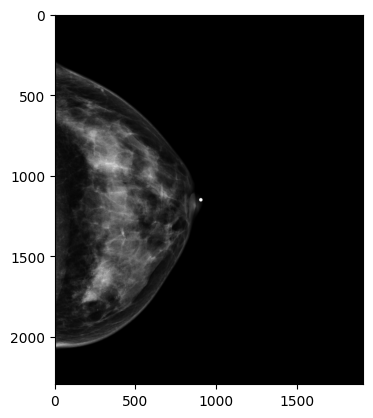

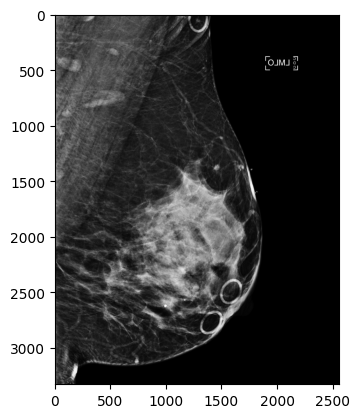

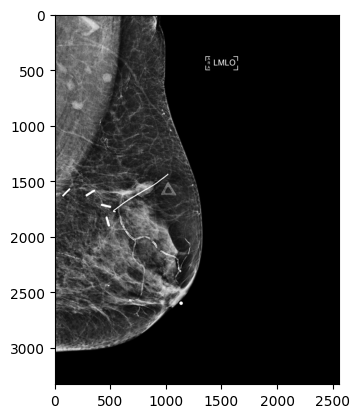

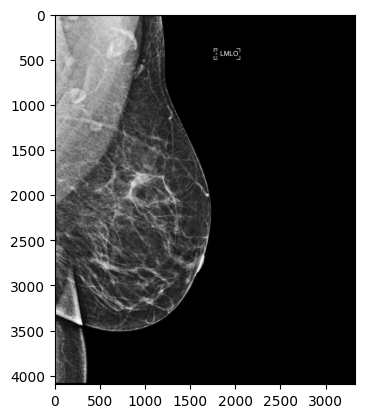

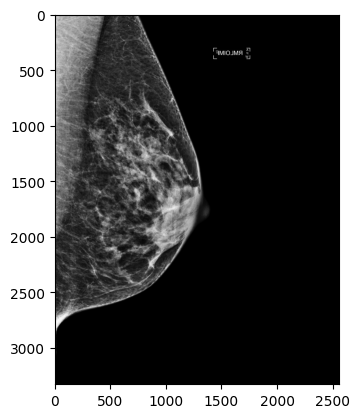

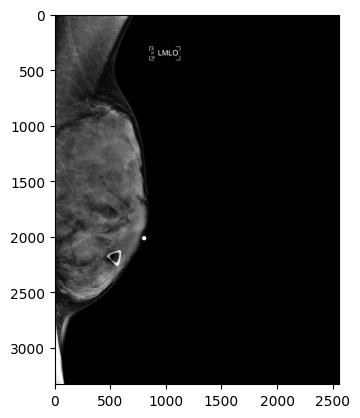

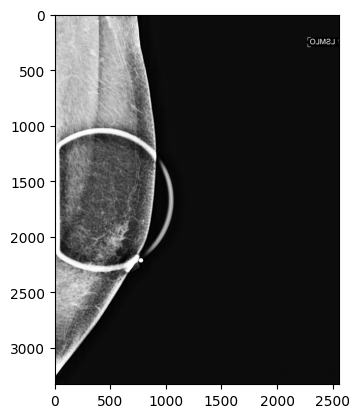

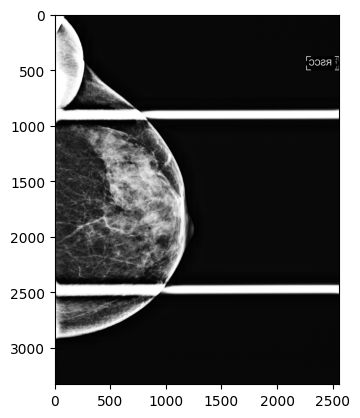

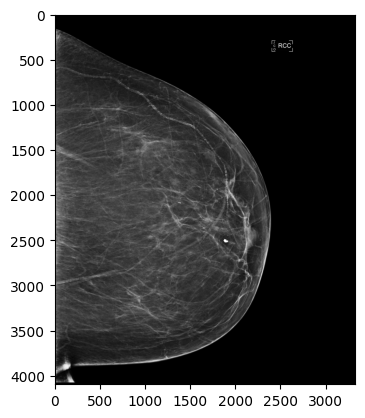

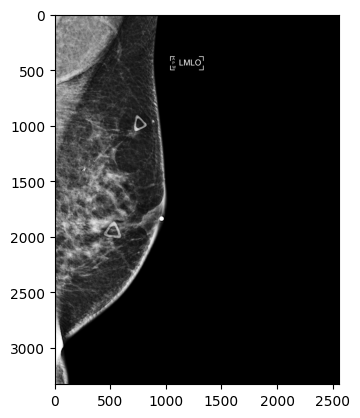

In [17]:
for k in [random.randint(0, 1000) for _ in range(10)]:

    img = plt.imread(train_data.png_path[k])
    plt.imshow(img, cmap="gray")
    plt.show()

In [14]:
import random